In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.shape

(200, 5)

In [6]:
df.isnull().any() # no null values present

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


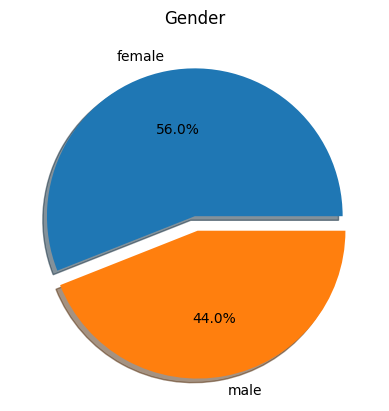

In [10]:
plt.pie(df.Gender.value_counts(), [0,0.1], labels = ['female', 'male'], autopct = '%1.1f%%', shadow = True)
plt.title('Gender')
plt.show()

In [21]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

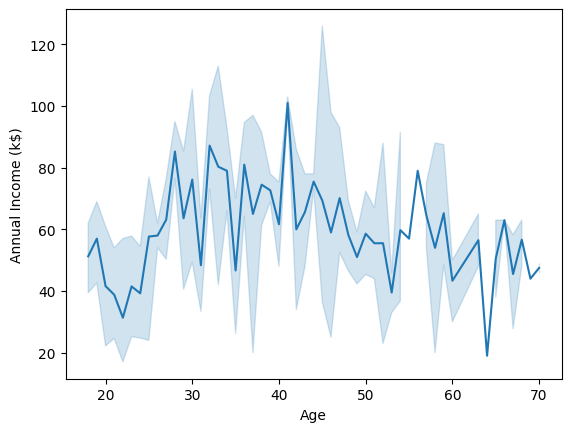

In [22]:
sns.lineplot(x = df.Age, y = df['Annual Income (k$)'])

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

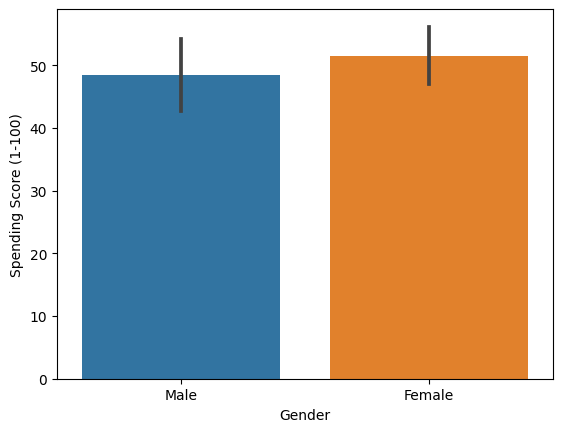

In [25]:
sns.barplot(x = df['Gender'], y = df['Spending Score (1-100)'])

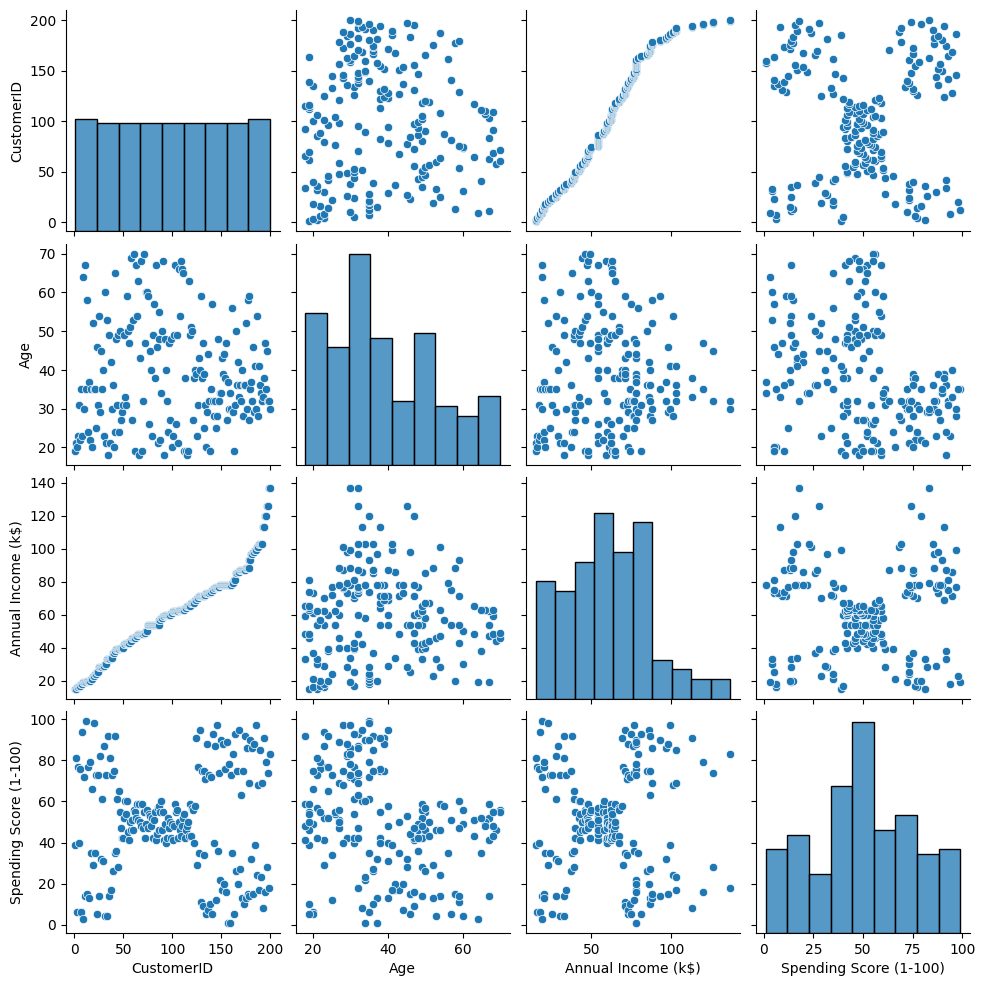

In [26]:
sns.pairplot(df)

In [51]:
# dropping these columns cause we only want to cluster into annual income and spending score
df_new = df.drop(columns = ['CustomerID', 'Gender', 'Age'], axis = 1)
df_new

,Annual Income (k$),Spending Score (1-100)
0,15.0,39
1,15.0,81
2,16.0,6
3,16.0,77
4,17.0,40
...,...,...
195,120.0,79
196,126.0,28
197,126.0,74
198,61.5,18


In [29]:
#Checking Outliers
median = df.median().to_dict() #dictionary containing column name as key and its median as value
median

<ipython-input-29-af5da678aca1>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = df.median().to_dict() #dictionary containing column name as key and its median as value


{'CustomerID': 100.5,
 'Age': 36.0,
 'Annual Income (k$)': 61.5,
 'Spending Score (1-100)': 50.0}

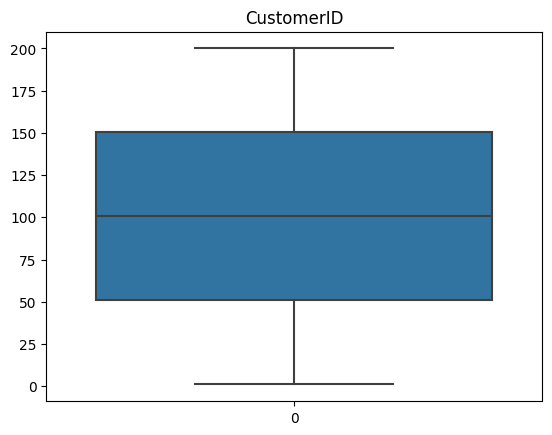

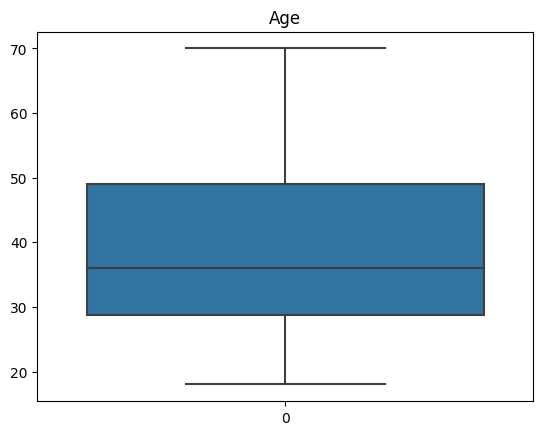

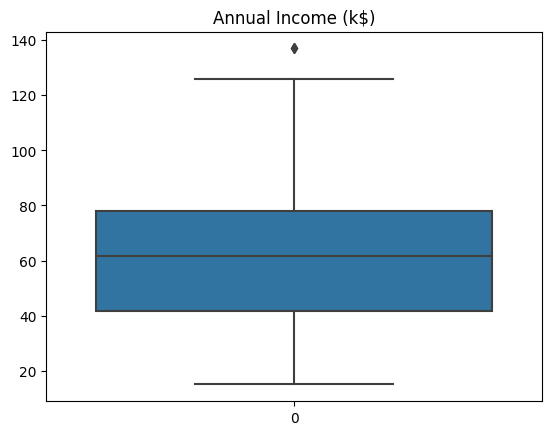

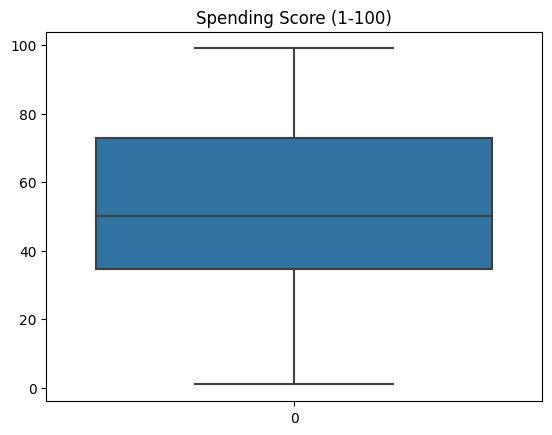

In [30]:
for col in median: #print boxplots of columns, Annual income has outlier present
  plt.figure()
  sns.boxplot(df[col])
  plt.title(col)

In [32]:
#removing outlier
q1 = df['Annual Income (k$)'].quantile(0.25)
q3 = df['Annual Income (k$)'].quantile(0.75)
iqr = q3 - q1
iqr
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

<Axes: >

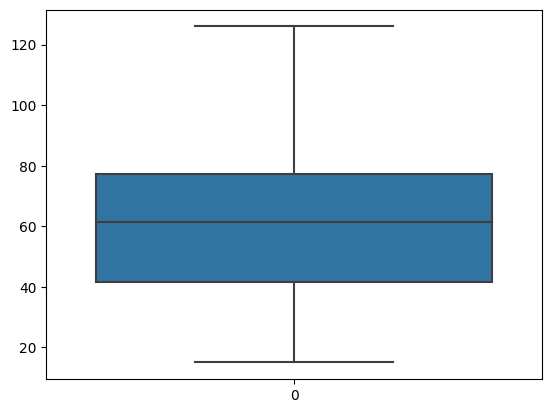

In [34]:
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)'] > upper_limit, median['Annual Income (k$)'], df['Annual Income (k$)'])
sns.boxplot(df['Annual Income (k$)'])

In [39]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

In [41]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [42]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

In [43]:
scale = MinMaxScaler()
scaled_Data = pd.DataFrame(scale.fit_transform(df), columns = df.columns)

In [44]:
scaled_Data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.009009,0.051020
3,0.015075,0.0,0.096154,0.009009,0.775510
4,0.020101,0.0,0.250000,0.018018,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.945946,0.795918
196,0.984925,0.0,0.519231,1.000000,0.275510
197,0.989950,1.0,0.269231,1.000000,0.744898
198,0.994975,1.0,0.269231,0.418919,0.173469


Choosing number of clusters

In [56]:
from sklearn import cluster

In [52]:
error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(df_new)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [54]:
error

[258182.89500000005,
 171461.67386954778,
 102283.01391906125,
 69614.42989643844,
 40494.033637799395,
 34728.61250605758,
 29079.527525982565,
 23885.154432307656,
 20710.67806616173,
 18654.24865249818]

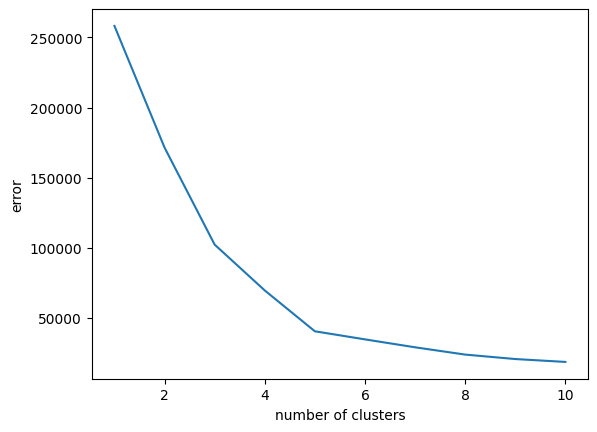

In [55]:
#plot elbow graph
plt.plot(range(1,11),error)
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()
#elbow point - 5

K Means CLustering

In [57]:
model = cluster.KMeans(n_clusters=5,init = 'k-means++',random_state=0)

In [61]:
model.fit(df_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [62]:
pred = model.predict(df_new)
pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [70]:
#Testing on random values
pred = model.predict([[0.945946, 0.816327]])
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

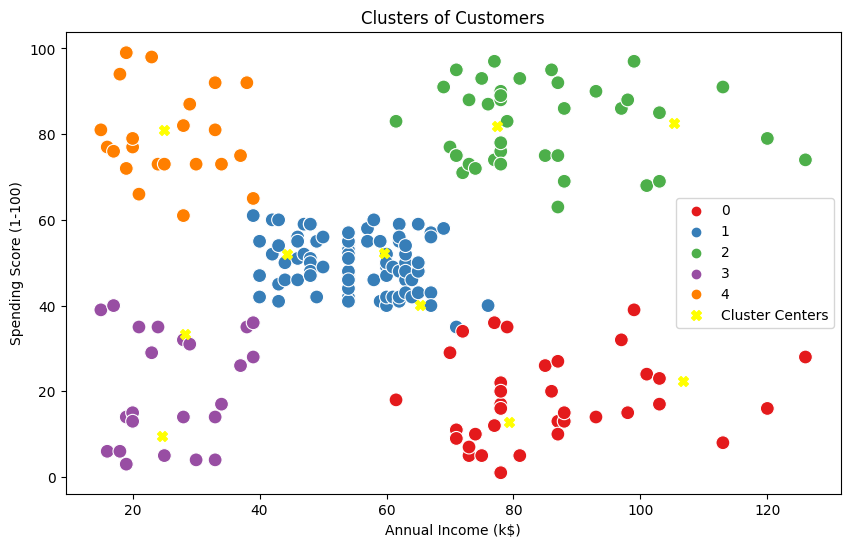

In [74]:
df['Cluster'] = model.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)
plt.scatter(
    kmeans.cluster_centers_[:, 0],  # x-coordinate of cluster centers
    kmeans.cluster_centers_[:, 1],  # y-coordinate of cluster centers
    s=50,
    c='yellow',
    label='Cluster Centers',
    marker='X'
)

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()